# **BIẾN VÀ Ý NGHĨA**
**Giới thiệu về ý nghĩa của 11 biến trong tập dữ liệu:**
* Airline: Cột chứa tên của các hãng hàng không. Có 6 hãng hàng không: IndiGo, AirIndia, JetAirway, GoAir, SpiceJet, JetAirway, Mutiples Carriers,
* Date_of_Journey: Cột chứa ngày chuyến bay cất cánh.
* Source: Thành phố nơi chuyến bay cất cánh
* Destination: Thành phố nơi chuyến bay đáp cánh.
* Route: Tuyến đường đi của chuyến bay (thể hiện ký hiệu từ thành phố nào qua thành phố nào)
* Dep_time: Thời gian khởi hành của chuyến bay.
* Arrival_time: Thời gian hạ cánh của chuyến bay.
* Duration: Tổng thời gian cần thiết để di chuyển giữa các thành phố tính bằng giờ.
* Total_Stops: Tổng số điểm dừng giữa thành phố nguồn và thành phố đích đến.
* Addinational_Info: Thông tin kèm theo nếu có.
* Price: Giá vé máy bay.


# **I. Import các thư viện liên quan**



In [2]:
import sys
!{sys.executable} -m pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 98.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=441456da9ae876307a91addc6ea9f99a67b6c5e956fbd50065ed0486de2b2f63
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unin

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from plotly.offline import iplot
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     \ 17.8 MB 24.2 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=7c389636602059f74eaade4144f4f00fe7fb15edf589c1393a93f159b437fca2
  Stored in directory: /tmp/pip-ephem-wheel-cache-al28ey5x/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
Successfully built ydata-profiling
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.6.4
    Uninstalling ydata-profiling-4.6.4:
      Successfully uninstalled ydata-profiling-4.6.4


<ipython-input-3-27093a528206>:13: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [4]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [5]:
from pandas_profiling import ProfileReport

# **II. Load dữ liệu vào Dataframe**





In [10]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# **III. EDA**

## **Phân tích mọi điểm bất thường trong dữ liệu (ví dụ: nếu nguồn và đích có cùng tên, hãy bỏ hàng), null, trùng lặp**

KẾT LUẬN:

--> Hầu hết dữ liệu đều là biến phân loại, sẽ cần mã hóa chúng trước khi kiểm tra mối quan hệ giữa các biến



In [11]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
list(df)

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']


Kết quả: Tập dữ liệu có 12 cột


In [13]:
df.shape

(10683, 11)

Kết quả: Tập dữ liệu chứa 10683 hàng và 11 cột





In [14]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB



Kết quả: --> Hầu hết dữ liệu đều mang tính phân loại, chúng tôi sẽ cần mã hóa chúng trước khi kiểm tra mối quan hệ giữa các biến
Trong tập dữ liệu, có một biến số, là biến mục tiêu 'giá' và biến còn lại là các biến phân loại .

In [15]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Trung bình giá vé máy bay là 9087 trong khi min là 4611 và max là 79512 => lệch phải, giá thấp được mua nhiều hơn là số lượng giá cao.
Độ lệch chuẩn lớn.

**Phân phối của biến Price**

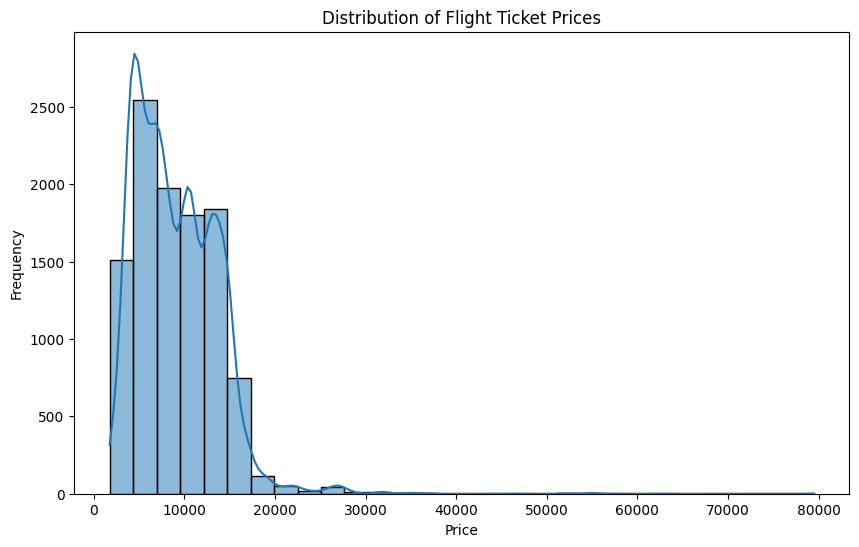

Mean Price: 9087.064120565385
Median Price: 8372.0
Standard Deviation of Price: 4611.3591668171175
Minimum Price: 1759
Maximum Price: 79512


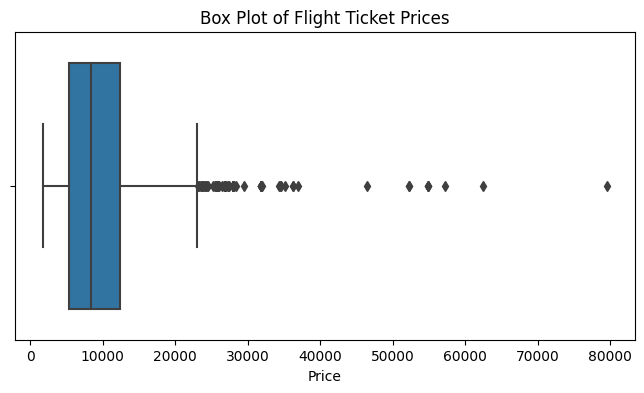

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

price_mean = df['Price'].mean()
price_median = df['Price'].median()
price_std = df['Price'].std()
price_min =df['Price'].min()
price_max = df['Price'].max()

print(f"Mean Price: {price_mean}")
print(f"Median Price: {price_median}")
print(f"Standard Deviation of Price: {price_std}")
print(f"Minimum Price: {price_min}")
print(f"Maximum Price: {price_max}")

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Flight Ticket Prices')
plt.xlabel('Price')
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

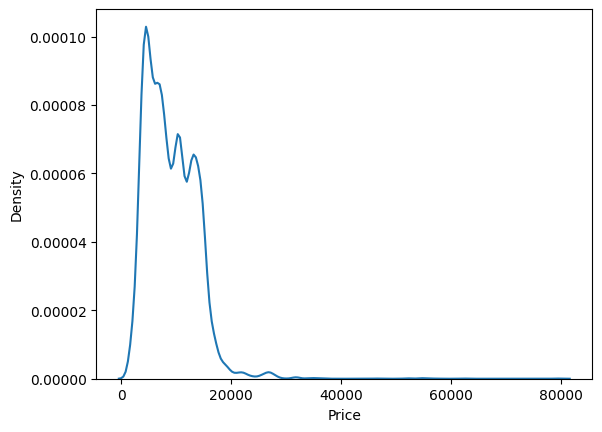

In [ ]:
sns.kdeplot(data= df, x="Price")

* Giá bị lệch phải có mức cao nhất từ ​​0 đến 20.000, điều đó có nghĩa là các chuyến bay có giá nằm trong phạm vi này được bán thường xuyên, biểu đồ cũng hiển thị giá ngoại lệ từ năm 20000
* Có outliers ở tất cả các hãng hàng không trong khoảng từ 20000 đến 80000

**Check duplicates values in dataset**

In [ ]:
print('Tổng số dòng: ',df.shape[0])
print('Tổng số cột: ',df.shape[1])
dupplicate_row = len(df)-len(df.drop_duplicates())
print('Số dòng bị trùng lặp: ',dupplicate_row)

Tổng số dòng:  10683
Tổng số cột:  11
Số dòng bị trùng lặp:  220


**Missing values**

In [ ]:
df = pd.DataFrame(df)
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Hiển thị từng giá trị và đếm số lượng của mỗi giá trị của mỗi cột**

In [ ]:
for col in list(df.columns):
    print("\nfor column : ", col,"\n")
    print(df[col].value_counts())


for column :  Airline 

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

for column :  Date_of_Journey 

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     

**Nếu nguồn và đích có cùng tên => Outliers**

In [ ]:
df[(df['Source']==df['Destination'])]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


**Sử dụng Data Profiling để xem tổng quan hơn:**

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **IV. PREPROCESSING**

### **VIẾT FUNCTION ĐỂ TRANSFORM DATA, CLEAN DATA, VÀ DUMMY ENCODING DATA ĐỂ CHẠY MÔ HÌNH HỒI QUY**






In [17]:
def clean_data(df):
    # Chuyển cột 'Date_of_Journey' thành kiểu dữ liệu datetime
    df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

    # Tạo cột 'Day_of_Journey' từ 'Date_of_Journey'
    df['Day_of_Journey'] = df['Date_of_Journey'].dt.day

    # Tính toán cột 't'
    df['t'] = df['Date_of_Journey'].dt.day - df['Day_of_Journey'].min()

    # Xử lý cột 'Dep_Time'
    df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
    df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
    df.drop(["Dep_Time"], axis=1, inplace=True)

    # Xử lý cột 'Arrival_Time'
    df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
    df.drop(["Arrival_Time"], axis=1, inplace=True)

    # Xử lý cột 'Duration'
    duration = df['Duration'].str.split(' ', expand=True)
    duration[1].fillna('00m', inplace=True)
    df['Duration_hr'] = duration[0].apply(lambda x: int(x[:-1]))
    df['Duration_min'] = duration[1].apply(lambda x: int(x[:-1]))
    df.drop(["Duration"], axis=1, inplace=True)

    # Xử lý cột 'Dep_hr' và 'Arrival_hr' để tạo cột mới dựa trên thời gian
    df['Deps'] = df['Dep_hr'].apply(lambda x: "Morning" if 6 <= x <= 12 else ("Afternoon" if 12 < x <= 18 else ("Evening" if 18 < x < 24 else 'Night')))
    df['Arrivals'] = df['Arrival_hr'].apply(lambda x: "Morning" if 6 <= x <= 12 else ("Afternoon" if 12 < x <= 18 else ("Evening" if 18 < x < 24 else 'Night')))

    # Xử lý cột 'Total_Stops'
    df['Total_Stops'] = df['Total_Stops'].str.extract(r'(\d+)').fillna('0').astype(int)

    # Xóa các hàng có giá trị NaN
    df.dropna(how='any', inplace=True)

    # Loại bỏ các bản ghi trùng lặp
    df.drop_duplicates(keep=False, inplace=True)

    df = df.drop(['Day_of_Journey','Date_of_Journey', 'Route', 'Additional_Info', 'Dep_hr',	'Dep_min',	'Arrival_hr','Arrival_min'], axis=1)

    df.info()

    return df

# def encode_data(df):
#     # Danh sách các biến liên tục và phân loại để dễ dàng xử lý
#     continuous_column_list = ['Total_Stops', 'Price', 't', 'Duration_hr', 'Duration_min']
#     all_columns = df.columns.tolist()
#     categorical_column_list = [col for col in all_columns if col not in continuous_column_list]

#     # Chuyển đổi kiểu dữ liệu của các biến phân loại sang string
#     df[categorical_column_list] = df[categorical_column_list].astype(str)
#     df_categorical = pd.get_dummies(df[categorical_column_list], drop_first=True)

#     # Kết hợp DataFrame của các biến liên tục và DataFrame biến phân loại đã chuyển đổi
#     df_combined = df[continuous_column_list].join(df_categorical)

#     return df_combined

def optimize_data(df):
    # Clean data
    df_cleaned = clean_data(df)

    # # Encode data
    # df_encoded = encode_data(df_cleaned)

    # # Chuyển kiểu dữ liệu các cột
    # df_cast = df_encoded.astype(int)

    # # Loại bỏ cột 'Duration_hr'
    # df_cast.drop(['Duration_hr'], axis=1, inplace=True)

    return df_cleaned

df = pd.read_excel('Data_Train.xlsx')

df_optimized = optimize_data(df)

df_optimized.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10263 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10263 non-null  object
 1   Source        10263 non-null  object
 2   Destination   10263 non-null  object
 3   Total_Stops   10263 non-null  int64 
 4   Price         10263 non-null  int64 
 5   t             10263 non-null  int64 
 6   Duration_hr   10263 non-null  int64 
 7   Duration_min  10263 non-null  int64 
 8   Deps          10263 non-null  object
 9   Arrivals      10263 non-null  object
dtypes: int64(5), object(5)
memory usage: 882.0+ KB


,Airline,Source,Destination,Total_Stops,Price,t,Duration_hr,Duration_min,Deps,Arrivals
0,IndiGo,Banglore,New Delhi,0,3897,23,2,50,Evening,Night
1,Air India,Kolkata,Banglore,2,7662,0,7,25,Night,Afternoon
2,Jet Airways,Delhi,Cochin,2,13882,8,19,0,Morning,Night
3,IndiGo,Kolkata,Banglore,1,6218,11,5,25,Afternoon,Evening
4,IndiGo,Banglore,New Delhi,1,13302,0,4,45,Afternoon,Evening


# **V. EDA by means of data visualization**



**Lợi nhuận của mỗi chuyến bay**




In [ ]:
airline_price_data = df.groupby('Airline')['Price'].sum().sort_values(ascending=False)
airline_price_data

Airline
Jet Airways                          41251700
Air India                            15626669
Multiple carriers                    13039603
IndiGo                               11513297
Vistara                               3708429
SpiceJet                              3518705
Air Asia                              1774329
GoAir                                 1137045
Jet Airways Business                   350152
Multiple carriers Premium economy      148445
Vistara Premium economy                 26887
Trujet                                   4140
Name: Price, dtype: int64

<Axes: xlabel='Airline'>

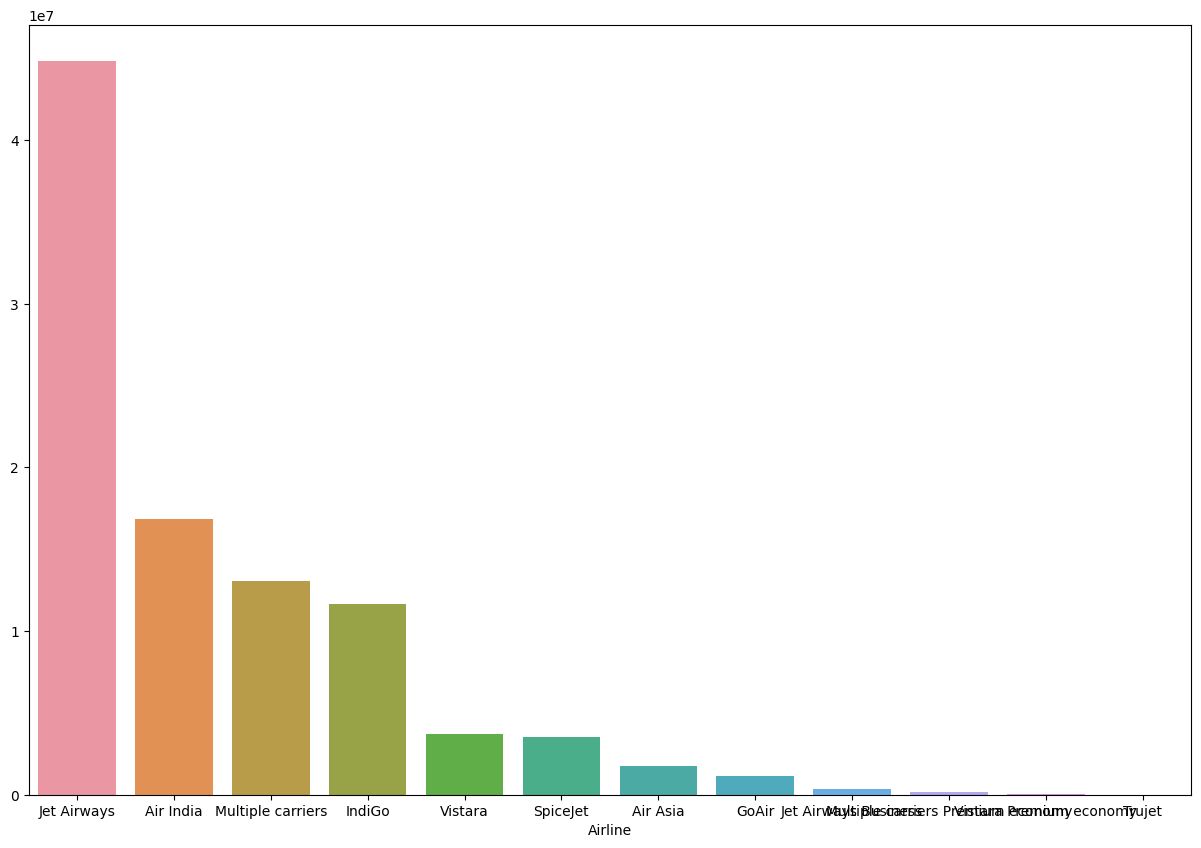

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=airline_price_data.index, y=airline_price_data.values)

<ipython-input-319-1d810ebc5d98>:2: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Axes: xlabel='Price', ylabel='Density'>

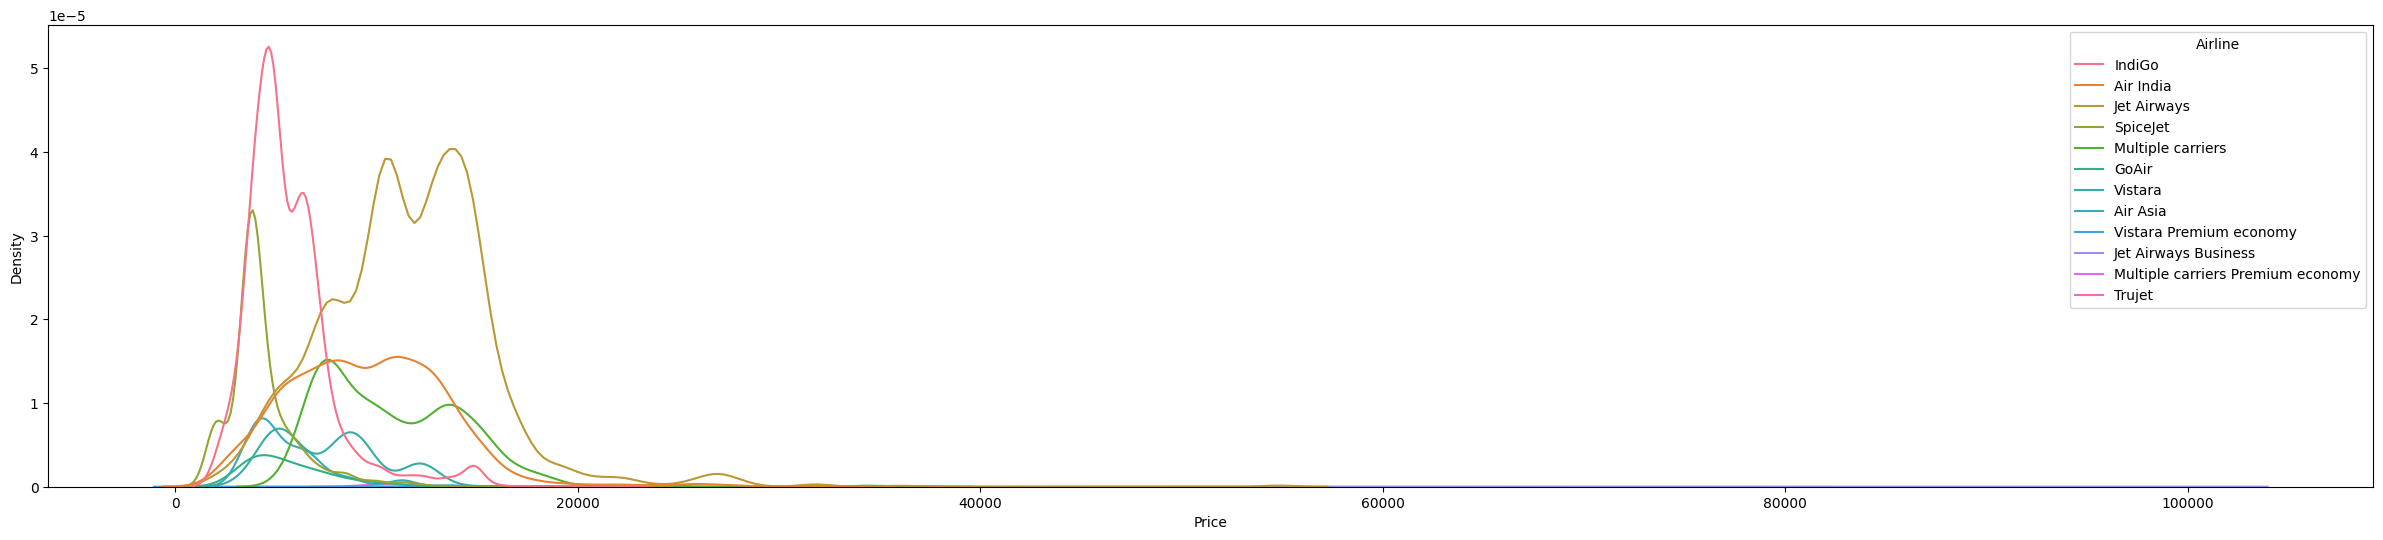

In [ ]:
plt.figure(figsize=(30, 6))
sns.kdeplot(data=df, x='Price', hue='Airline')

=> Hãng bay Jet Airways có số người chi tiền vào nhiều nhất, xếp thứ hai là Air India. Tuy nhiên mức độ chi tiền vào vé bay có giá cao của khách hàng thuộc Air India nhiều hơn, đường trên biểu đồ của Air India phổ rộng và cao ở khoảng giữa 5000 đến 15000.

**Số lượng chuyến bay giữa các hãng hàng không, so sánh giá**

In [ ]:
# Shows the effect of the duration of flights on the price.
count_airline = df['Airline'].value_counts().sort_values()
count_airline

Trujet                                  1
Vistara Premium economy                 3
Jet Airways Business                    6
Multiple carriers Premium economy      13
GoAir                                 194
Air Asia                              319
Vistara                               479
SpiceJet                              818
Multiple carriers                    1196
Air India                            1752
IndiGo                               2053
Jet Airways                          3849
Name: Airline, dtype: int64

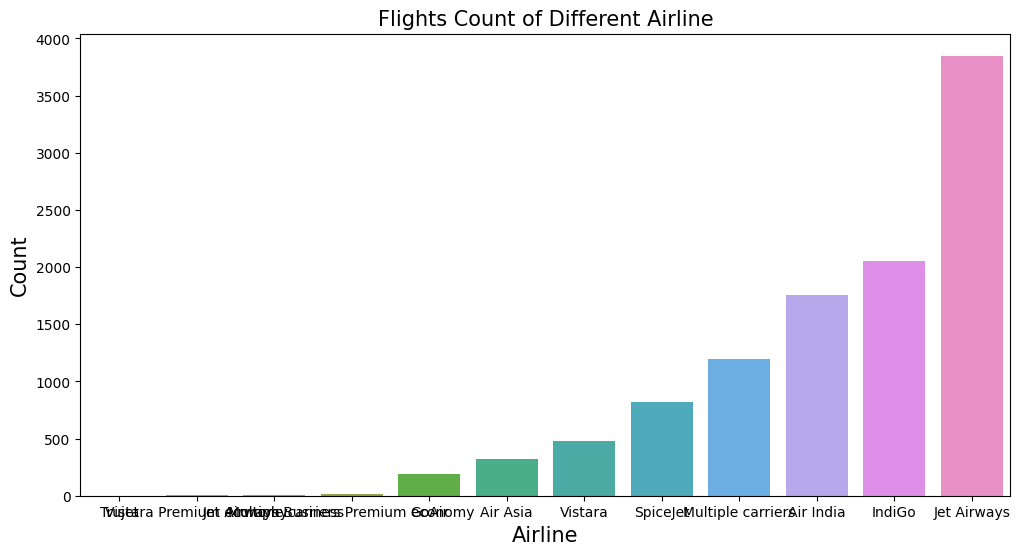

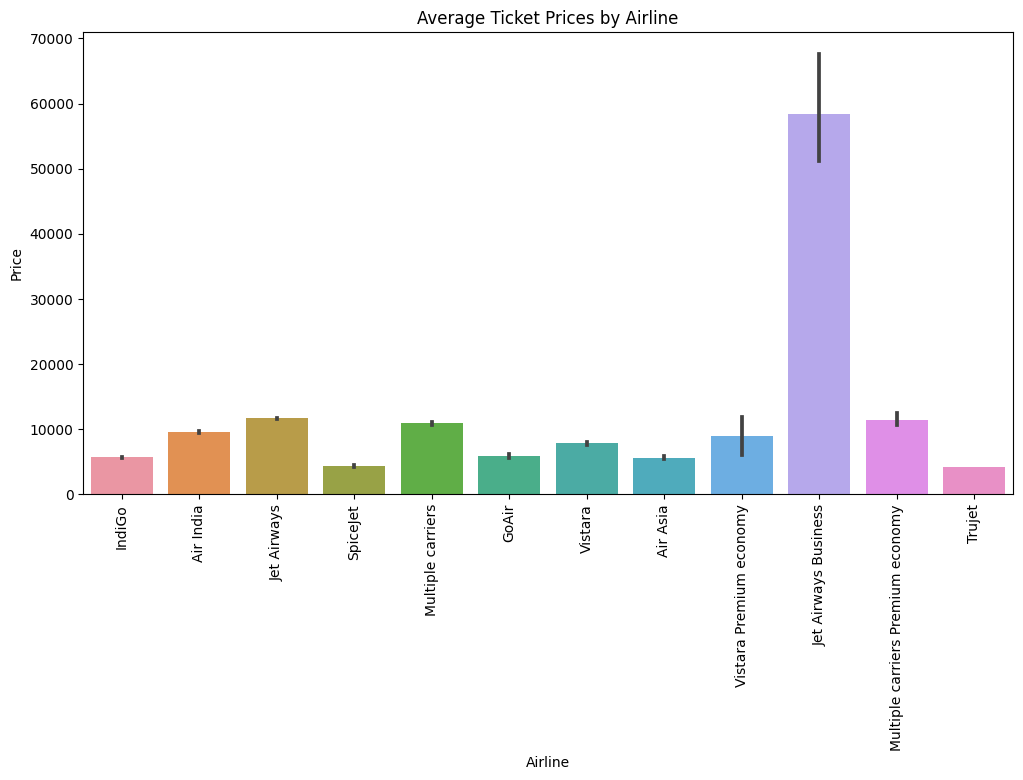

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index[::-1])
plt.title('Flights Count of Different Airline', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

# Create a bar plot to compare airline prices
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**Hãng hàng không nào cung cấp nhiều chuyến bay nhất giữ thành phố nguồn và thành phố đến**

In [ ]:
airline_source_des = df.groupby(['Airline','Source','Destination']).size().sort_values(ascending=False).reset_index()
airline_source_des

,Airline,Source,Destination,0
0,Jet Airways,Delhi,Cochin,1586
1,Jet Airways,Kolkata,Banglore,1256
2,Multiple carriers,Delhi,Cochin,1196
3,Air India,Delhi,Cochin,747
4,IndiGo,Delhi,Cochin,705
5,Air India,Kolkata,Banglore,512
6,IndiGo,Kolkata,Banglore,445
7,Jet Airways,Banglore,New Delhi,418
8,Jet Airways,Banglore,Delhi,370
9,IndiGo,Banglore,Delhi,366


In [ ]:
airline_source = df.groupby(['Airline','Source']).size().sort_values(ascending=False).reset_index()
airline_source

,Airline,Source,0
0,Jet Airways,Delhi,1586
1,Jet Airways,Kolkata,1256
2,Multiple carriers,Delhi,1196
3,Jet Airways,Banglore,788
4,Air India,Delhi,747
5,IndiGo,Delhi,705
6,IndiGo,Banglore,523
7,Air India,Kolkata,512
8,IndiGo,Kolkata,445
9,Air India,Banglore,332


In [ ]:
airline_des = df.groupby(['Airline','Destination']).size().sort_values(ascending=False).reset_index()
airline_des

,Airline,Destination,0
0,Jet Airways,Cochin,1586
1,Jet Airways,Banglore,1256
2,Multiple carriers,Cochin,1196
3,Air India,Cochin,747
4,IndiGo,Cochin,705
5,Air India,Banglore,512
6,IndiGo,Banglore,445
7,Jet Airways,New Delhi,418
8,Jet Airways,Delhi,370
9,IndiGo,Delhi,366


<Axes: xlabel='Source', ylabel='0'>

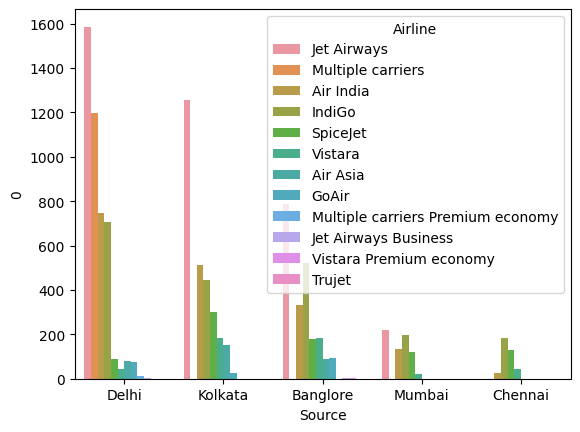

In [ ]:
sns.barplot(data=airline_source, x='Source', y=0, hue='Airline')

<Axes: xlabel='Destination', ylabel='0'>

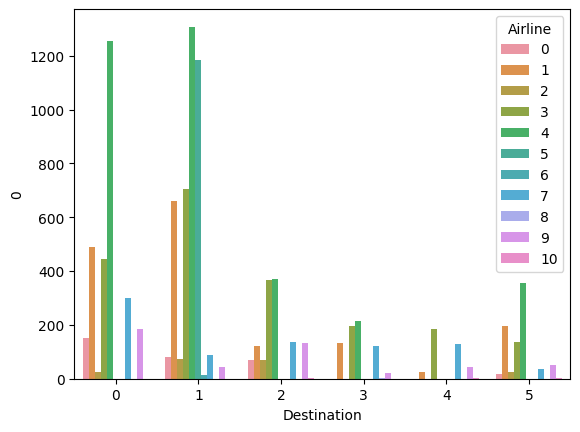

In [ ]:
sns.barplot(data=airline_des, x='Destination', y=0, hue='Airline')

**Trung bình giá vé của mỗi hãng**


In [ ]:
airline_mean_price = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
airline_mean_price

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9611.210616
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

<Axes: xlabel='Airline'>

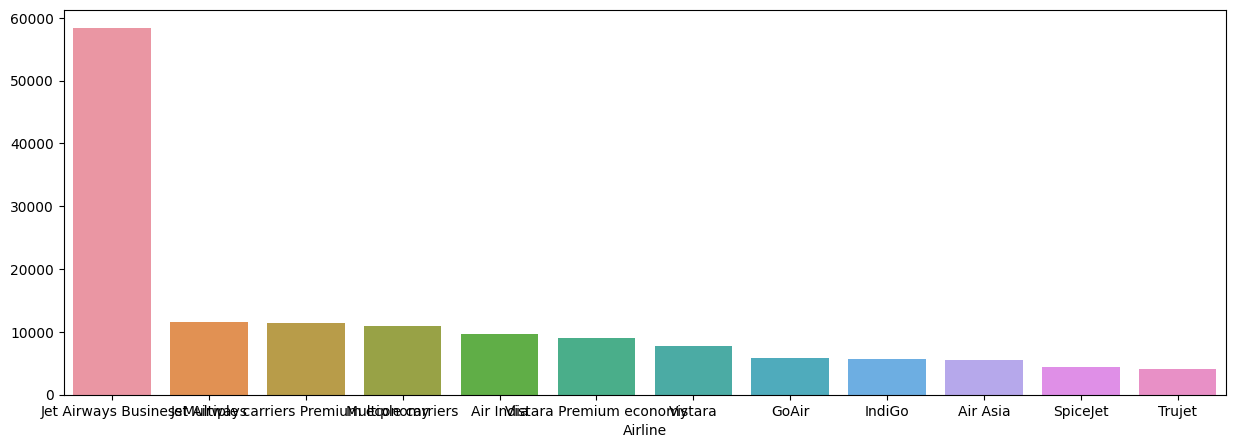

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=airline_mean_price.index, y=airline_mean_price.values)

**Điểm đến và điểm xuất phát nào phổ biến nhất**

In [ ]:
des_popular = df["Destination"].value_counts()
des_popular

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
source_popular = df["Source"].value_counts()
source_popular

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Text(0.5, 1.0, 'Count of Source')

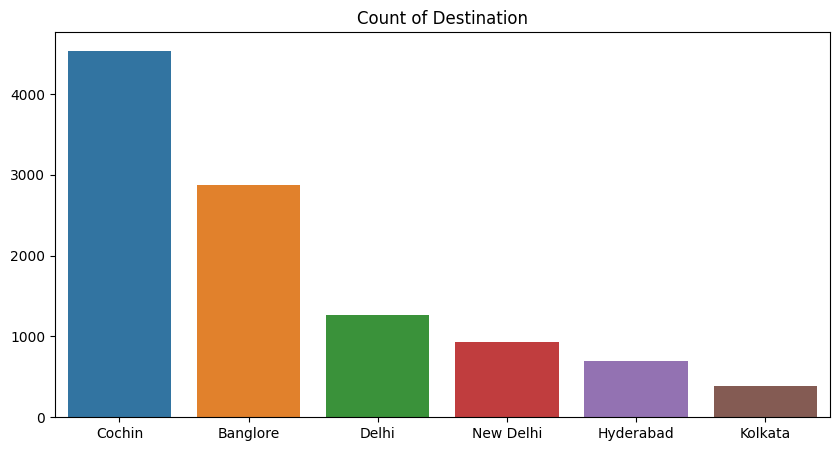

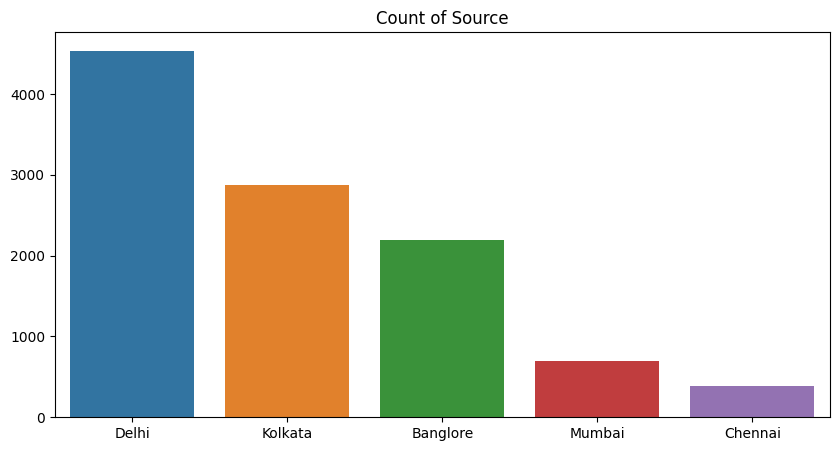

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x=des_popular.index, y=des_popular.values)
plt.title("Count of Destination")

plt.figure(figsize = (10,5))
sns.barplot(x=source_popular.index, y=source_popular.values)
plt.title("Count of Source")

**ĐẾM SỐ CHUYẾN BAY THEO GIỜ KHỞI HÀNH**

In [ ]:
count_deps = df["Deps"].value_counts()
count_deps

Morning      4461
Afternoon    2870
Evening      2258
Night        1094
Name: Deps, dtype: int64

<Axes: >

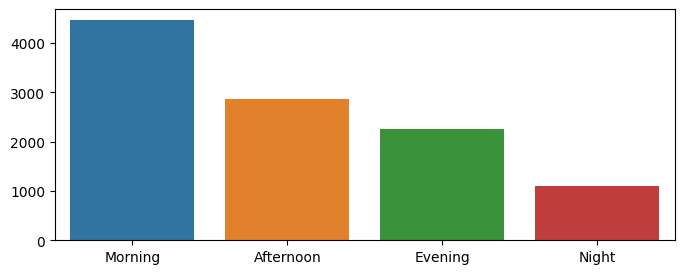

In [ ]:
plt.figure(figsize=(8, 3 ))
sns.barplot(x=count_deps.index, y=count_deps.values)

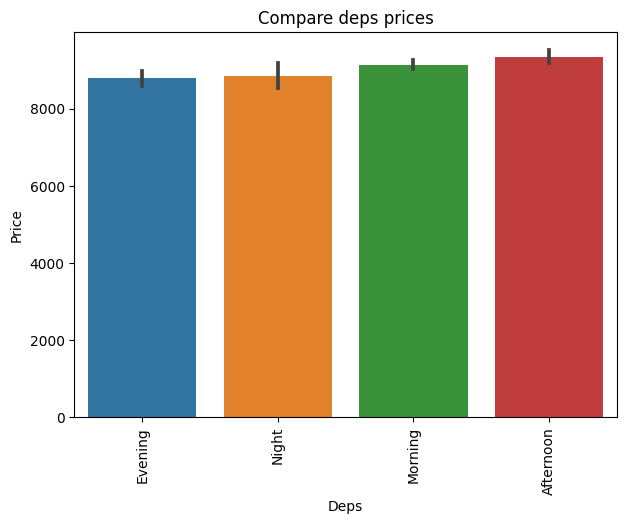

In [ ]:
# Create a bar plot to compare deps prices
plt.figure(figsize=(7, 5))
sns.barplot(x='Deps', y='Price', data=df)
plt.title('Compare deps prices')
plt.xlabel('Deps')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
mean_price_deps = df.groupby(['Deps'])['Price'].mean().sort_values(ascending=False)
mean_price_deps

Deps
Afternoon    9342.222648
Morning      9136.609280
Night        8842.213894
Evening      8783.494686
Name: Price, dtype: float64

**ĐẾM SỐ CHUYẾN BAY THEO GIỜ ĐÁP**

In [ ]:
count_arrival = df["Arrivals"].value_counts()
count_arrival

Evening      3838
Morning      3101
Night        1884
Afternoon    1860
Name: Arrivals, dtype: int64

<Axes: >

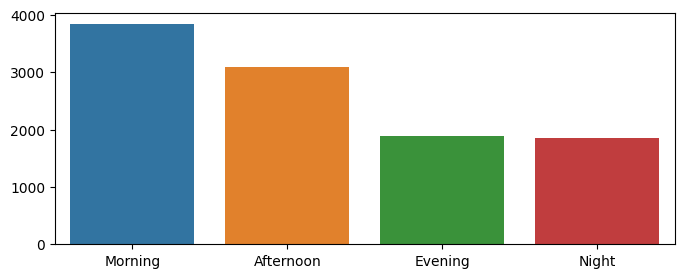

In [ ]:
plt.figure(figsize=(8, 3 ))
sns.barplot(x=count_deps.index, y=count_arrival.values)

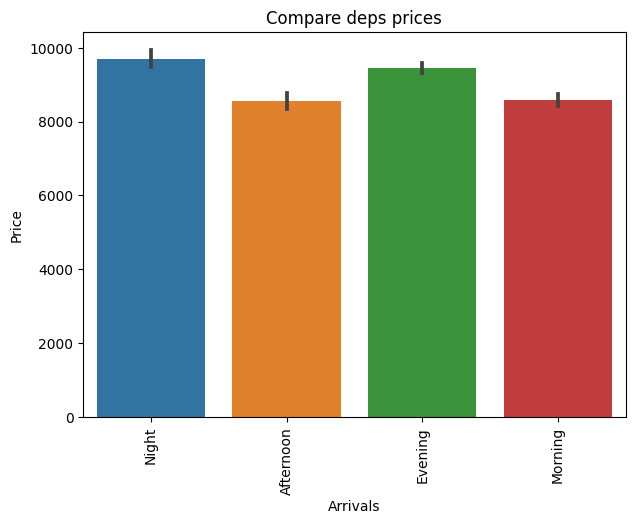

In [ ]:
# Create a bar plot to compare deps prices
plt.figure(figsize=(7, 5))
sns.barplot(x='Arrivals', y='Price', data=df)
plt.title('Compare deps prices')
plt.xlabel('Arrivals')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

<Axes: xlabel='Arrivals'>

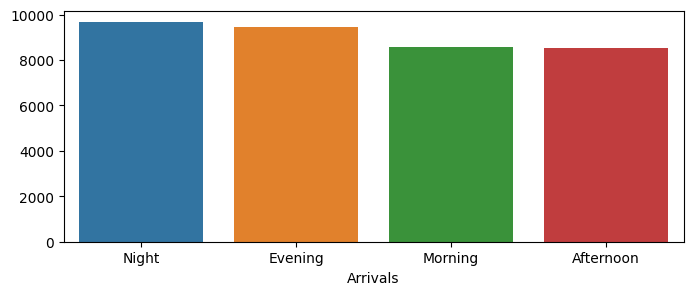

In [ ]:
mean_price_arrivals = df.groupby(['Arrivals'])['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 3 ))
sns.barplot(x=mean_price_arrivals.index, y=mean_price_arrivals.values)

**Giá thay đổi như thế nào dựa trên giờ khởi hành và giờ đáp**

In [ ]:
change_price = df.groupby(['Deps','Arrivals'])['Price'].mean().sort_values(ascending=False)
change_price

Deps       Arrivals 
Evening    Afternoon    11946.270492
Afternoon  Night        11841.108607
Night      Afternoon    11678.467290
Afternoon  Morning      11643.538793
Morning    Night        11539.948148
Night      Evening      11456.362791
Evening    Morning      11155.400000
Morning    Evening      10660.232574
           Afternoon     8973.996904
Afternoon  Evening       8866.297771
Evening    Night         7908.796834
           Evening       7896.877996
Night      Night         7739.240343
           Morning       7713.218924
Morning    Morning       7290.753968
Afternoon  Afternoon     6790.099698
Name: Price, dtype: float64

Text(0, 0.5, 'Price')

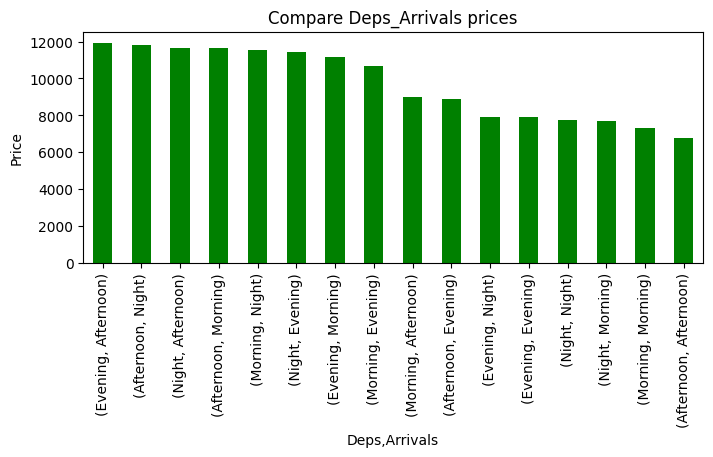

In [ ]:
fig = plt.figure(figsize = (8, 3))
change_price.plot(kind='bar', color = 'green')
plt.title('Compare Deps_Arrivals prices')
plt.ylabel('Price')

Giờ khởi hành và giờ cất cánh vào buổi chiều thì giấ vé sẽ thấp nhất hoặc là cả hai đều vào buổi sáng

=> Có thể thấy tại giờ khởi hành thì số lượng chuyến bay khởi hành vào buổi sáng cất cánh nhiều nhất
=> Buổi chiều là giờ hạ cánh nhiều nhất
=> Nhưng xét về giá thay đổi thì mức giá vào buổi chiều khi khởi hành sẽ có giá trị trung bình rẻ nhất

**Giá vé dựa trên Source và Destination places**

In [ ]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
price_source_des = df.groupby(['Source','Destination'])['Price'].mean().sort_values(ascending=False)
price_source_des

Source    Destination
Banglore  New Delhi      11917.716738
Delhi     Cochin         10539.439057
Kolkata   Banglore        9158.389411
Banglore  Delhi           5143.918577
Mumbai    Hyderabad       5059.708752
Chennai   Kolkata         4789.892388
Name: Price, dtype: float64

Text(0, 0.5, 'Price')

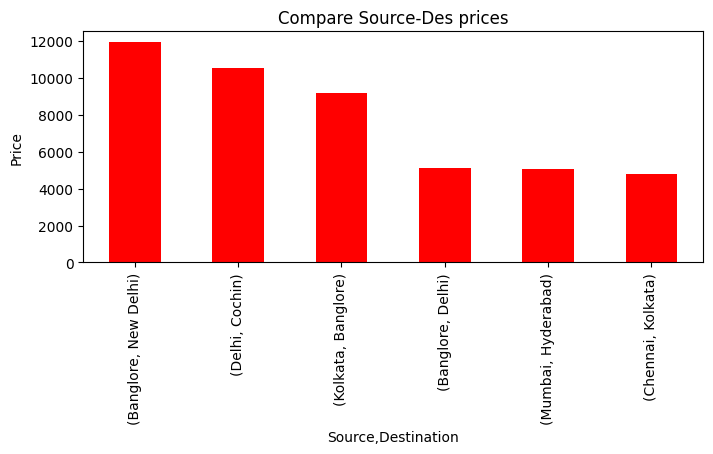

In [ ]:
fig = plt.figure(figsize = (8, 3))
price_source_des.plot(kind='bar', color = 'red')
plt.title('Compare Source-Des prices')
plt.xlabel('Source,Destination')
plt.ylabel('Price')

Chennai ->  Kolkata => có giá thấp nhất  

**Giá vé dựa trên Route**


In [ ]:
df['Total_Stops'].value_counts().sort_values(ascending=False)

1    5625
0    3492
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [ ]:
price_totalstops = df.groupby(['Total_Stops'])['Price'].mean().sort_values(ascending=False).reset_index()
price_totalstops

,Total_Stops,Price
0,4,17686.000000
1,3,13112.000000
2,2,12715.807895
3,1,10594.123556
4,0,5025.603379


Text(0, 0.5, 'Price')

<Figure size 800x300 with 0 Axes>

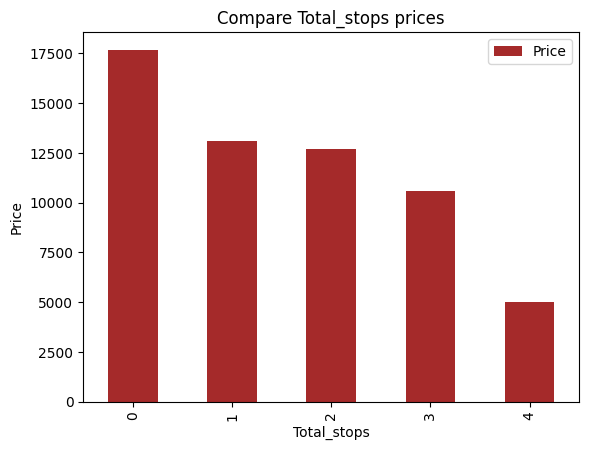

In [ ]:
fig = plt.figure(figsize = (8, 3))
price_totalstops.plot(kind='bar', color = 'brown')
plt.title('Compare Total_stops prices')
plt.xlabel('Total_stops')
plt.ylabel('Price')

Không có trạm dừng sẽ chiếm tỉ lệ cao nhất

# **VI. PREDICTING WITH MODELS**

### **FUNCTION ENCODING DỮ LIỆU TRƯỚC KHI ĐI VÀO DỰNG MÔ HÌNH HỒI QUY**

In [19]:
def encode_data(df):
    # Danh sách các biến liên tục và phân loại để dễ dàng xử lý
    continuous_column_list = ['Total_Stops', 'Price', 't', 'Duration_hr', 'Duration_min']
    all_columns = df.columns.tolist()
    categorical_column_list = [col for col in all_columns if col not in continuous_column_list]

    # Chuyển đổi kiểu dữ liệu của các biến phân loại sang string
    df[categorical_column_list] = df[categorical_column_list].astype(str)
    df_categorical = pd.get_dummies(df[categorical_column_list], drop_first=True)

    # Kết hợp DataFrame của các biến liên tục và DataFrame biến phân loại đã chuyển đổi
    df_combined = df[continuous_column_list].join(df_categorical)

    return df_combined

def optimize_data(df):
    # Clean data
    df_cleaned = clean_data(df)

    # Encode data
    df_encoded = encode_data(df_cleaned)

    # Chuyển kiểu dữ liệu các cột
    df_cast = df_encoded.astype(int)

    # Loại bỏ cột 'Duration_hr'
    df_cast.drop(['Duration_hr'], axis=1, inplace=True)

    return df_cast

df = pd.read_excel('Data_Train.xlsx')

df_optimized = optimize_data(df)

df_optimized.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10263 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10263 non-null  object
 1   Source        10263 non-null  object
 2   Destination   10263 non-null  object
 3   Total_Stops   10263 non-null  int64 
 4   Price         10263 non-null  int64 
 5   t             10263 non-null  int64 
 6   Duration_hr   10263 non-null  int64 
 7   Duration_min  10263 non-null  int64 
 8   Deps          10263 non-null  object
 9   Arrivals      10263 non-null  object
dtypes: int64(5), object(5)
memory usage: 882.0+ KB


,Total_Stops,Price,t,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Deps_Evening,Deps_Morning,Deps_Night,Arrivals_Evening,Arrivals_Morning,Arrivals_Night
0,0,3897,23,50,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,2,7662,0,25,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,13882,8,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,6218,11,25,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,13302,0,45,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0



### **Correlation Analysis**

Tương quan Pearson là thước đo phổ biến nhất để đánh giá mối tương quan giữa các biến, giá trị trong khoảng từ -1 đến 1:
* -1 biểu thị mối tương quan nghịch hoàn hảo (khi một biến tăng thì biến kia giảm).
* 0 biểu thị không có mối tương quan.
* 1 biểu thị mối tương quan dương hoàn hảo (khi một biến tăng thì biến kia cũng tăng).

In [20]:
df_optimized.corr()

,Total_Stops,Price,t,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Deps_Evening,Deps_Morning,Deps_Night,Arrivals_Evening,Arrivals_Morning,Arrivals_Night
Total_Stops,1.000000,0.600668,-0.028119,-0.162212,0.273842,-0.055217,-0.287722,0.179574,0.020607,0.149806,...,-0.454252,-0.261092,-0.237884,0.016450,-0.091438,0.073520,0.015463,0.120298,-0.069140,0.026393
Price,0.600668,1.000000,-0.163851,-0.136879,0.050044,-0.093179,-0.354847,0.406951,0.257578,0.151064,...,-0.309686,-0.227848,-0.177168,0.209844,-0.042097,0.016691,-0.028888,0.065927,-0.067780,0.043262
t,-0.028119,-0.163851,1.000000,-0.009440,-0.031449,-0.001766,0.011946,-0.029407,-0.032202,0.046996,...,0.006562,-0.011596,0.008792,-0.077060,-0.006113,0.007511,-0.001339,0.010615,-0.016722,0.009849
Duration_min,-0.162212,-0.136879,-0.009440,1.000000,-0.020622,0.070991,0.125502,-0.106710,-0.002061,-0.117491,...,0.229977,-0.015781,-0.099006,0.075379,0.032073,0.015942,0.044559,-0.149972,0.059462,0.052790
Airline_Air India,0.273842,0.050044,-0.031449,-0.020622,1.000000,-0.060622,-0.217066,-0.318899,-0.010563,-0.158619,...,-0.066780,0.025710,-0.050628,0.059517,-0.041203,0.018187,0.024884,0.051805,0.060206,-0.144367
Airline_GoAir,-0.055217,-0.093179,-0.001766,0.070991,-0.060622,1.000000,-0.068988,-0.101353,-0.003357,-0.050413,...,0.098135,-0.037468,-0.027255,0.018131,-0.000398,0.056254,-0.038540,-0.005649,0.004936,-0.041317
Airline_IndiGo,-0.287722,-0.354847,0.011946,0.125502,-0.217066,-0.068988,1.000000,-0.362910,-0.012021,-0.180511,...,0.085833,0.056291,0.140333,-0.034449,0.015959,-0.084558,0.112411,-0.066400,-0.055243,0.090565
Airline_Jet Airways,0.179574,0.406951,-0.029407,-0.106710,-0.318899,-0.101353,-0.362910,1.000000,-0.017660,-0.265194,...,-0.043508,-0.019015,-0.143374,0.076839,0.101425,-0.101171,-0.051495,-0.061774,0.044478,0.031452
Airline_Jet Airways Business,0.020607,0.257578,-0.032202,-0.002061,-0.010563,-0.003357,-0.012021,-0.017660,1.000000,-0.008784,...,-0.009069,-0.006529,-0.004749,0.049775,0.007516,-0.012570,0.032697,-0.018129,0.010994,0.010697
Airline_Multiple carriers,0.149806,0.151064,0.046996,-0.117491,-0.158619,-0.050413,-0.180511,-0.265194,-0.008784,1.000000,...,-0.136178,-0.098036,-0.071314,-0.112053,-0.161785,0.193925,-0.044154,0.191566,-0.211176,0.073993


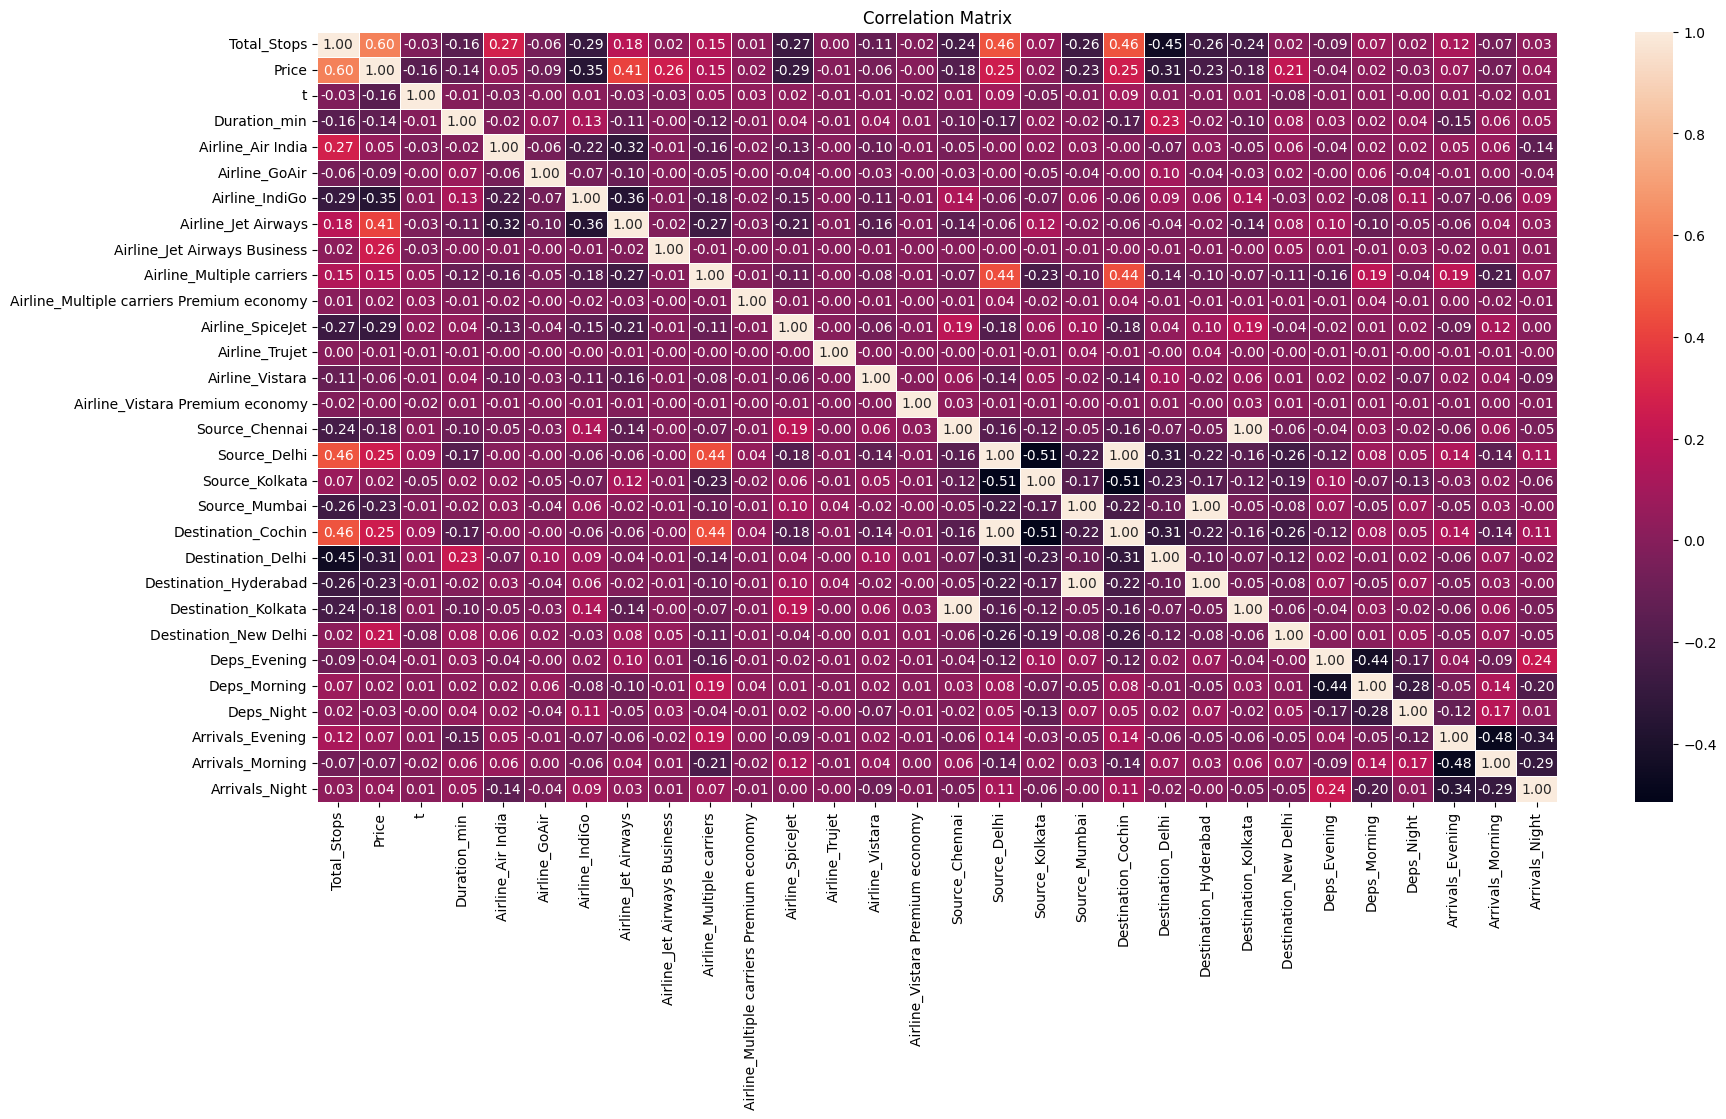

In [21]:
pearsons = df_optimized.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(pearsons, annot=True,  fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Nhận xét về mối tương quan giữa biến Price với những biến còn lại:
* Tương quan cao nhất là Price - Total_Stops: 0.66
=> Số chặn dừng sẽ ảnh hưởng nhiều đến giá vé.

### **MÔ HÌNH HỒI QUY ĐƠN BIẾN**

In [22]:
df_optimized['Price'].unique()

array([ 3897,  7662, 13882, ..., 12352, 11733, 12648])

In [23]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state


In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

Do Hệ số tương quan của biến Total_Stops là lớn nhất trong tổng số biến => chọn biến cho mô hình hồi quy tuyến tính đơn biến.

In [25]:
predict='Price'
x=np.array(df_optimized['Total_Stops'])
y=np.array(df_optimized[predict])


In [26]:
import statsmodels.api as sm
X_sm = sm.add_constant(x)
ols = sm.OLS(y,X_sm.astype(float)).fit()

In [27]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     5792.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:51:48   Log-Likelihood:                -98905.
No. Observations:               10263   AIC:                         1.978e+05
Df Residuals:                   10261   BIC:                         1.978e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5599.4233     57.494     97.391      0.0

### **MÔ HÌNH HỒI QUY TUYẾN TÍNH ĐA BIẾN**

Cả hai biến Total_Stops và Duration_hr có cùng hệ số tương quan với
biến mục tiêu Price => có thể gây ra hiện tượng đa cộng tuyến khi chạy mô hình hồi quy tuyến tính bội.
=> Bỏ 1 trong hai biến.

In [ ]:
predict='Price'
Xs = np.array(df_optimized.drop(['Price'], axis = 1))
y = np.array(df_optimized[predict])

reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression()

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[ 2.85064680e+03 -7.07934772e+01  1.21332247e+00  1.54937264e+03
 -4.48758604e+01  1.53679825e+02  4.28920967e+03  4.76463917e+04
  3.42438407e+03  4.63856476e+03 -2.75543246e+02 -2.40054502e+03
  2.17885691e+03  3.23238944e+03 -5.35159154e+01 -4.54318255e+01
 -2.86484764e+02 -8.62986405e+02 -4.54318255e+01 -1.10613464e+03
 -8.62986405e+02 -5.35159154e+01  2.35455355e+03 -3.00062557e+02
 -3.15805360e+02 -3.24253955e+02 -9.19156930e+01 -2.00638321e+02
  2.57093614e+02]
5751.638575461406


In [ ]:
reg.score(Xs, y)

0.6158483830905654

**OLS TRONG HỒI QUY**

In [28]:
predict='Price'
x1=np.array(df_optimized.drop(['Price'], axis = 1))
y1=np.array(df_optimized[predict])

In [29]:
import statsmodels.api as sm
X_sm = sm.add_constant(x1)
ols = sm.OLS(y1,X_sm.astype(float)).fit()

In [30]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     656.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:51:53   Log-Likelihood:                -96292.
No. Observations:               10263   AIC:                         1.926e+05
Df Residuals:                   10237   BIC:                         1.928e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4705.8861    164.197     28.660      0.0

In [35]:
list(df_optimized)

['Total_Stops',
 'Price',
 't',
 'Duration_min',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi',
 'Deps_Evening',
 'Deps_Morning',
 'Deps_Night',
 'Arrivals_Evening',
 'Arrivals_Morning',
 'Arrivals_Night']

**Biến x3, x5, x6, x11, x12, x14, x20, x27 có p-value** > 0.
05 => Không có ý nghĩa thống kê
=> Loại.

In [32]:
df_pred1 = df_optimized

In [36]:
predict='Price'
x2=np.array(df_pred1.drop(['Price', 'Duration_min',  'Airline_GoAir','Airline_IndiGo', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara Premium economy',   'Destination_Delhi', 'Arrivals_Evening'], axis = 1))
y2=np.array(df_pred1[predict])

In [37]:
import statsmodels.api as sm
X_sm = sm.add_constant(x2)
ols = sm.OLS(y2,X_sm.astype(float)).fit()

In [38]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     909.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:56:19   Log-Likelihood:                -96302.
No. Observations:               10263   AIC:                         1.926e+05
Df Residuals:                   10244   BIC:                         1.928e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4677.5256    113.301     41.284      0.0

P-values thỏa mãn < 0.05 => tất cả các biến đều có ý nghĩa thống kê
Durbin-watson thõa mản có ý nghĩa
Const có ý nghĩa.

### **ĐÁNH GIÁ MÔ HÌNH BẰNG R-SQUARED VÀ GIÁ TRỊ TƯƠNG QUAN**

In [42]:
import statsmodels.api as sm

# R-squared
R_squared = ols.rsquared
# Giá trị tương quan
correlation = np.sqrt(R_squared)

print("Giá trị R-squared:", R_squared)
print("Giá trị tương quan:", correlation)

Giá trị R-squared: 0.6151284326564777
Giá trị tương quan: 0.7843012384641999


### **CHẠY HỒI QUY TIẾN HOẶC LÙI ĐỂ CHỌN MÔ HÌNH HỒI QUY TỐT NHẤT**

In [ ]:
def backward_stepwise_regression(X, y, significance_level=0.05):
    remaining_features = list(X.columns)
    selected_features = []
    rsquared_values = []
    best_model = None

    while len(remaining_features) > 0:
        models = {}
        for feature in remaining_features:
            features = selected_features + [feature]
            X_temp = X[features]
            X_with_intercept = sm.add_constant(X_temp)
            model = sm.OLS(y, X_with_intercept).fit()
            models[feature] = model.rsquared_adj

        best_feature = max(models, key=models.get)
        remaining_features.remove(best_feature)
        selected_features.append(best_feature)
        rsquared_values.append(models[best_feature])

    best_features = selected_features[:len(selected_features)-1]  # Lấy danh sách biến trước khi dừng
    X_best = X[best_features] if best_features else X.copy()

    while True:
        X_with_intercept = sm.add_constant(X_best)
        best_model = sm.OLS(y, X_with_intercept).fit()
        p_values = best_model.pvalues[1:]  # Exclude intercept p-value
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()
            if feature_to_remove == 'const':
                break
            else:
                X_best = X_best.drop(columns=[feature_to_remove])
        else:
            break

    X_with_intercept = sm.add_constant(X_best)
    best_model = sm.OLS(y, X_with_intercept).fit()

    return best_model

# Sử dụng dữ liệu df_optimized từ quá trình xử lý trước đó
X = df_optimized.drop(columns=['Price'])  # Features
y = df_optimized['Price']  # Target

best_ols_model = backward_stepwise_regression(X, y)

if best_ols_model:
    print("Best model summary:")
    print(best_ols_model.summary())

Best model summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     863.2
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:22:19   Log-Likelihood:                -96296.
No. Observations:               10263   AIC:                         1.926e+05
Df Residuals:                   10243   BIC:                         1.928e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

### **ỨNG DỤNG NHẬP GIÁ TRỊ BIẾN ĐỂ DỰ ĐOÁN GIÁ VÉ MÁY BAY VÀ DỰ ĐOÁN KHOẢNG GIÁ TRỊ MIN-MAX**

In [ ]:
# Tạo dictionary chứa các giá trị cho biến phân loại
airline_options = {
    'Air India': 0,
    'Jet Airways': 0,
    'Jet Airways Business': 0,
    'Multiple carriers': 0,
    'Multiple carriers Premium economy': 0,
    'Vistara': 0,
    'SpiceJet': 0
}

source_options = {
    'Mumbai': 0,
    'Kolkata': 0,
    'Chennai': 0,
    'Delhi': 0
}

destination_options = {
    'New Delhi': 0,
    'Cochin': 0,
    'Hyderabad': 0
}

deps_options = {
    'Morning': 0,
    'Evening': 0,
    'Night': 0
}

arrivals_options = {
    'Morning': 0,
    'Night': 0
}

def select_value_from_list(options):
    print("Danh sách giá trị có sẵn:")
    for idx, key in enumerate(options.keys()):
        print(f"{idx + 1}. {key}")

    while True:
        choice = input("Nhập số thứ tự của giá trị bạn muốn chọn: ")
        if choice.isdigit() and 0 < int(choice) <= len(options):
            selected_key = list(options.keys())[int(choice) - 1]
            break
        else:
            print("Vui lòng nhập lại số thứ tự hợp lệ.")

    # Cập nhật giá trị được chọn thành 1 và các giá trị còn lại trong cùng một nhóm thành 0
    for key in options.keys():
        if key == selected_key:
            options[key] = 1
        else:
            options[key] = 0

    return options

# ... (Phần định nghĩa airline_options, source_options, destination_options, deps_options, arrivals_options)

# Tạo DataFrame chứa tất cả các cột với giá trị mặc định là 0
initial_columns = ['Total_Stops', 't', 'Duration_min'] + list(airline_options.keys()) + list(source_options.keys()) + list(destination_options.keys()) + list(deps_options.keys()) + list(arrivals_options.keys())
initial_values = [0] * len(initial_columns)

initial_df = pd.DataFrame([initial_values], columns=initial_columns)

# Nhập giá trị cho các biến liên tục
total_stops = int(input("Nhập giá trị cho Total_Stops: "))
t_value = int(input("Nhập giá trị cho t: "))

# Chọn giá trị cho các biến phân loại
airline_choice = select_value_from_list(airline_options)
source_choice = select_value_from_list(source_options)
destination_choice = select_value_from_list(destination_options)
deps_choice = select_value_from_list(deps_options)
arrivals_choice = select_value_from_list(arrivals_options)

# Gán giá trị 1 tương ứng với lựa chọn của người dùng vào DataFrame mới
user_input = {
    'Total_Stops': total_stops,
    't': t_value,
    **airline_choice,
    **source_choice,
    **destination_choice,
    **deps_choice,
    **arrivals_choice
}

# Cập nhật DataFrame mới với lựa chọn của người dùng
for col, val in user_input.items():
    initial_df.at[0, col] = val

# Sử dụng mô hình để dự đoán giá trị Price dựa trên dữ liệu người dùng nhập vào
# Sử dụng mô hình để dự đoán giá trị Price dựa trên dữ liệu người dùng nhập vào
input_with_intercept = sm.add_constant(initial_df)

predicted_values = best_ols_model.predict(input_with_intercept)

std_error = np.std(best_ols_model.resid)


# Tính toán khoảng dự đoán

min_predicted_price = predicted_values[0] - 1.96 * std_error  # Giả sử mức tin cậy 95%

max_predicted_price = predicted_values[0] + 1.96 * std_error  # Giả sử mức tin cậy 95%


print("Dữ liệu nhập của người dùng:")

print(initial_df)

print("\nGiá trị dự đoán là:", predicted_values[0])

print("Khoảng dự đoán 95%: từ", min_predicted_price, "đến", max_predicted_price)

Nhập giá trị cho Total_Stops: 1
Nhập giá trị cho t: 2
Danh sách giá trị có sẵn:
1. Air India
2. Jet Airways
3. Jet Airways Business
4. Multiple carriers
5. Multiple carriers Premium economy
6. Vistara
7. SpiceJet
Nhập số thứ tự của giá trị bạn muốn chọn: 1
Danh sách giá trị có sẵn:
1. Mumbai
2. Kolkata
3. Chennai
4. Delhi
Nhập số thứ tự của giá trị bạn muốn chọn: 2
Danh sách giá trị có sẵn:
1. New Delhi
2. Cochin
3. Hyderabad
Nhập số thứ tự của giá trị bạn muốn chọn: 1
Danh sách giá trị có sẵn:
1. Morning
2. Evening
3. Night
Nhập số thứ tự của giá trị bạn muốn chọn: 1
Danh sách giá trị có sẵn:
1. Morning
2. Night
Nhập số thứ tự của giá trị bạn muốn chọn: 2
Dữ liệu nhập của người dùng:
   Total_Stops  t  Duration_min  Air India  Jet Airways  Jet Airways Business  \
0            1  2             0          1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  Vistara  SpiceJet  \
0                  0                                  0        0 